# Data Exploration
Considering ketamine vs. non-ketamine trials, as well as KO vs WT mice.

In [1]:
# packages
import os
import pandas as pd
import math
from scipy import io
import numpy as np
from numpy import squeeze
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

from scipy.io import loadmat
np.random.seed(42)

import seaborn as sns

In [2]:
allData1= pd.read_csv('allTrialsAllCellsTable10cm.csv')
print(allData1.keys())
allData2 = pd.read_csv('sessionTrialTable.csv')
print(allData2.keys())

Index(['animalName', 'sessionDate', 'trialNum', 'cellNum', 'gender',
       'genotype', 'weight_g', 'ketamine_day', 'timeSinceKetamine',
       'ketamineAdministered', 'spatialBin10cm1', 'spatialBin10cm2',
       'spatialBin10cm3', 'spatialBin10cm4', 'spatialBin10cm5',
       'spatialBin10cm6', 'spatialBin10cm7', 'spatialBin10cm8',
       'spatialBin10cm9', 'spatialBin10cm10', 'spatialBin10cm11',
       'spatialBin10cm12', 'spatialBin10cm13', 'spatialBin10cm14',
       'spatialBin10cm15', 'spatialBin10cm16', 'spatialBin10cm17',
       'spatialBin10cm18', 'spatialBin10cm19', 'spatialBin10cm20',
       'spatialBin10cm21', 'spatialBin10cm22', 'spatialBin10cm23',
       'spatialBin10cm24', 'spatialBin10cm25', 'spatialBin10cm26',
       'spatialBin10cm27', 'spatialBin10cm28', 'spatialBin10cm29',
       'spatialBin10cm30', 'spatialBin10cm31', 'spatialBin10cm32',
       'spatialBin10cm33', 'spatialBin10cm34', 'spatialBin10cm35',
       'spatialBin10cm36', 'spatialBin10cm37', 'spatialBin10cm38

In [4]:
DataKeys = allData1.keys()
BinDataKeys = DataKeys[20:]

In [ ]:
# stdNeuralData = StandardScaler().fit_transform(neuralData) #consider using normalization instead of standardizing
# ketBool = allData1['ketamineAdministered']
# timeSinceKetamine = allData1['timeSinceKetamine']

# Data with Merged Cell and Bin Statistics

In [14]:
df_pre = allData2[allData2['ketamineAdministered']==0]
df_post = allData2[allData2['ketamineAdministered']==1]
df_WT = allData2[allData2['genotype']=='WT']
df_KO = allData2[allData2['genotype']=='KO']

## Data distribution: overall

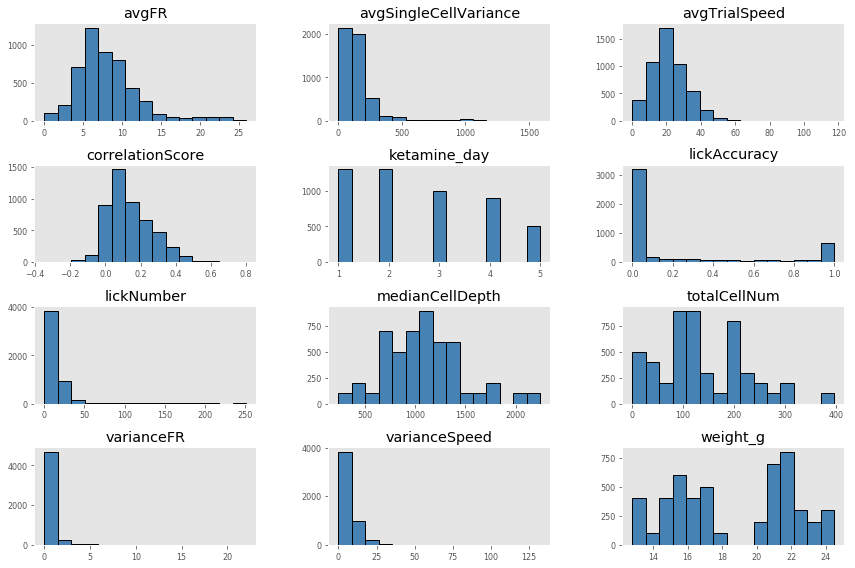

In [10]:
allData2.drop(['trialNum','ketamineAdministered','sessionDate','timeSinceKetamine'],axis=1).hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   

## Data distribution: pre-ketamine

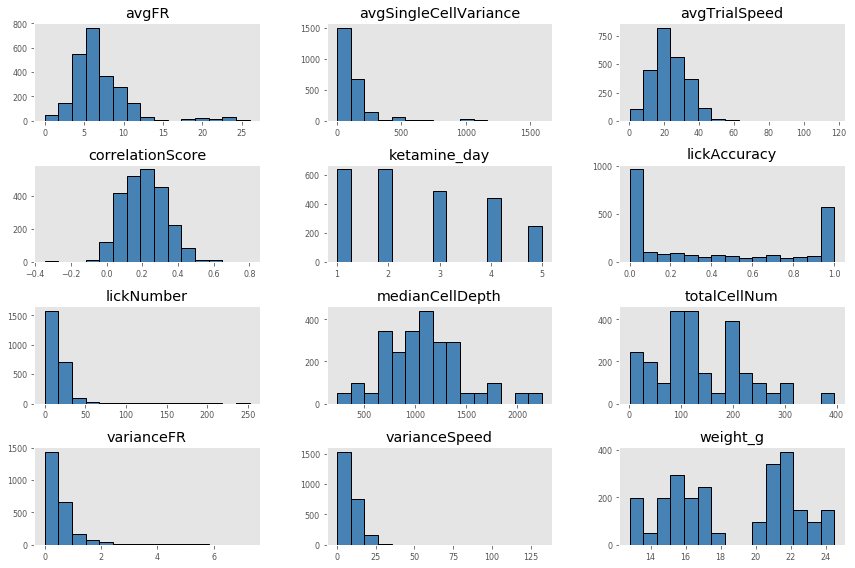

In [12]:
df_pre.drop(['trialNum','ketamineAdministered','sessionDate','timeSinceKetamine'],axis=1).hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   

## Data distribution: post-ketamine

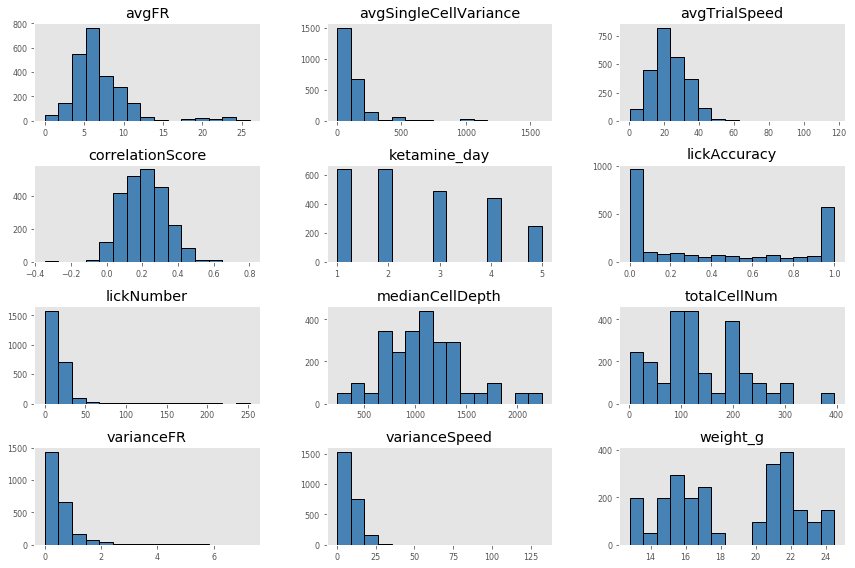

In [12]:
df_pre.drop(['trialNum','ketamineAdministered','sessionDate','timeSinceKetamine'],axis=1).hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   

## Data distribution: WT

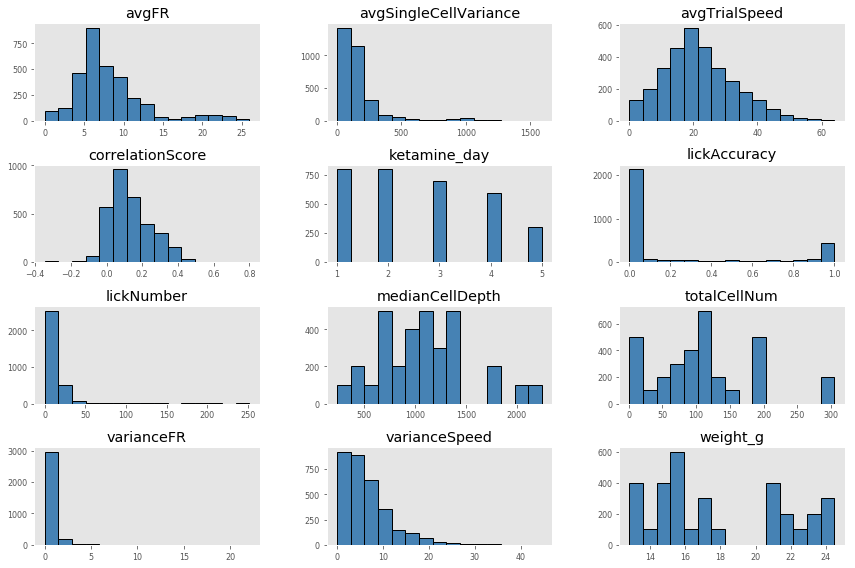

In [15]:
df_WT.drop(['trialNum','ketamineAdministered','sessionDate','timeSinceKetamine'],axis=1).hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   

## Data distribution: KO

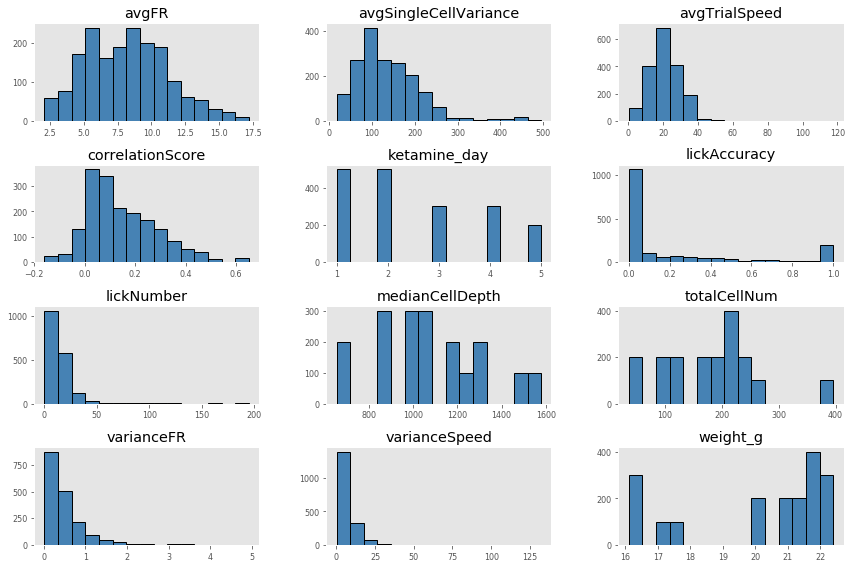

In [17]:
df_KO.drop(['trialNum','ketamineAdministered','sessionDate','timeSinceKetamine'],axis=1).hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))   

In [ ]:
df = allData2

# Close Look

In [73]:
df = allData1

In [74]:
df.head()

,animalName,sessionDate,trialNum,cellNum,gender,genotype,weight_g,ketamine_day,timeSinceKetamine,ketamineAdministered,...,spatialBin10cm31,spatialBin10cm32,spatialBin10cm33,spatialBin10cm34,spatialBin10cm35,spatialBin10cm36,spatialBin10cm37,spatialBin10cm38,spatialBin10cm39,spatialBin10cm40
0,G1,190817,1,1,F,WT,16.6,1,-2159.98,0,...,28.317522,29.152351,24.553158,16.864090,10.103739,7.678917,7.424348,10.465461,18.916476,24.356181
1,G1,190817,2,1,F,WT,16.6,1,-2077.86,0,...,2.601407,7.138574,16.237924,20.770897,18.043453,13.471003,9.140031,7.703536,12.292435,22.405978
2,G1,190817,3,1,F,WT,16.6,1,-1985.80,0,...,7.194221,8.068197,6.219806,4.732802,4.646587,4.706258,4.878894,4.001588,2.673178,3.351321
3,G1,190817,4,1,F,WT,16.6,1,-1958.26,0,...,0.518717,0.029294,0.000000,0.000000,0.000000,0.000000,0.000000,0.233404,1.455292,3.379255
4,G1,190817,5,1,F,WT,16.6,1,-1931.06,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036400 entries, 0 to 2036399
Data columns (total 50 columns):
animalName              object
sessionDate             int64
trialNum                int64
cellNum                 int64
gender                  object
genotype                object
weight_g                float64
ketamine_day            int64
timeSinceKetamine       float64
ketamineAdministered    int64
spatialBin10cm1         float64
spatialBin10cm2         float64
spatialBin10cm3         float64
spatialBin10cm4         float64
spatialBin10cm5         float64
spatialBin10cm6         float64
spatialBin10cm7         float64
spatialBin10cm8         float64
spatialBin10cm9         float64
spatialBin10cm10        float64
spatialBin10cm11        float64
spatialBin10cm12        float64
spatialBin10cm13        float64
spatialBin10cm14        float64
spatialBin10cm15        float64
spatialBin10cm16        float64
spatialBin10cm17        float64
spatialBin10cm18        float64
spat

In [76]:
df.describe()

,sessionDate,trialNum,cellNum,weight_g,ketamine_day,timeSinceKetamine,ketamineAdministered,spatialBin10cm1,spatialBin10cm2,spatialBin10cm3,...,spatialBin10cm31,spatialBin10cm32,spatialBin10cm33,spatialBin10cm34,spatialBin10cm35,spatialBin10cm36,spatialBin10cm37,spatialBin10cm38,spatialBin10cm39,spatialBin10cm40
count,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,...,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06,2.036400e+06
mean,1.907825e+05,1.504524e+02,9.501783e+01,1.912667e+01,2.516201e+00,1.666056e+03,6.698399e-01,7.449363e+00,7.607499e+00,7.766425e+00,...,7.896045e+00,7.871557e+00,7.835213e+00,7.784260e+00,7.703585e+00,7.614007e+00,7.548224e+00,7.507207e+00,7.460892e+00,7.411210e+00
std,2.419281e+03,8.660303e+01,7.365196e+01,3.469718e+00,1.420843e+00,3.179745e+03,4.702707e-01,1.182329e+01,1.217742e+01,1.256495e+01,...,1.281490e+01,1.279029e+01,1.273568e+01,1.264308e+01,1.252066e+01,1.241487e+01,1.235283e+01,1.230452e+01,1.216745e+01,1.188904e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.068740e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.907040e+05,7.500000e+01,3.700000e+01,1.610000e+01,1.000000e+00,-4.283600e+02,0.000000e+00,2.382394e-01,1.898215e-01,8.164228e-02,...,2.080055e-03,1.889401e-03,4.365748e-04,0.000000e+00,0.000000e+00,0.000000e+00,5.212141e-04,1.756573e-02,7.626436e-02,1.786109e-01
50%,1.908270e+05,1.500000e+02,7.900000e+01,2.080000e+01,2.000000e+00,1.163260e+03,1.000000e+00,3.002170e+00,2.871886e+00,2.782767e+00,...,2.782382e+00,2.770698e+00,2.743472e+00,2.699548e+00,2.646867e+00,2.595972e+00,2.571763e+00,2.576705e+00,2.644450e+00,2.885120e+00
75%,1.909300e+05,2.250000e+02,1.390000e+02,2.190000e+01,4.000000e+00,2.871640e+03,1.000000e+00,9.621188e+00,9.891710e+00,1.014701e+01,...,1.038199e+01,1.033591e+01,1.027536e+01,1.022570e+01,1.011140e+01,9.982089e+00,9.874183e+00,9.794701e+00,9.696734e+00,9.567018e+00
max,1.910160e+05,3.020000e+02,3.960000e+02,2.450000e+01,5.000000e+00,1.933114e+04,1.000000e+00,2.321496e+02,3.027121e+02,3.195254e+02,...,2.856409e+02,2.912053e+02,2.879125e+02,2.870966e+02,2.919667e+02,3.039072e+02,3.039533e+02,2.948818e+02,2.838353e+02,2.492121e+02


In [77]:
mice_list = df['animalName'].unique()
df_by_mouse = {}
for entry in df['animalName'].unique():
    df_by_mouse[entry] = df[df['animalName']==entry]

In [79]:
df = df_by_mouse['G1']
df = df[df['ketamine_day']==1]

In [81]:
df.shape

(32700, 50)

In [83]:
df.head()

,animalName,sessionDate,trialNum,cellNum,gender,genotype,weight_g,ketamine_day,timeSinceKetamine,ketamineAdministered,...,spatialBin10cm31,spatialBin10cm32,spatialBin10cm33,spatialBin10cm34,spatialBin10cm35,spatialBin10cm36,spatialBin10cm37,spatialBin10cm38,spatialBin10cm39,spatialBin10cm40
0,G1,190817,1,1,F,WT,16.6,1,-2159.98,0,...,28.317522,29.152351,24.553158,16.864090,10.103739,7.678917,7.424348,10.465461,18.916476,24.356181
1,G1,190817,2,1,F,WT,16.6,1,-2077.86,0,...,2.601407,7.138574,16.237924,20.770897,18.043453,13.471003,9.140031,7.703536,12.292435,22.405978
2,G1,190817,3,1,F,WT,16.6,1,-1985.80,0,...,7.194221,8.068197,6.219806,4.732802,4.646587,4.706258,4.878894,4.001588,2.673178,3.351321
3,G1,190817,4,1,F,WT,16.6,1,-1958.26,0,...,0.518717,0.029294,0.000000,0.000000,0.000000,0.000000,0.000000,0.233404,1.455292,3.379255
4,G1,190817,5,1,F,WT,16.6,1,-1931.06,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Individual Trial: Pre-Ketamine

In [84]:
temp = df
temp = temp[temp['trialNum']==75]
temp = temp.iloc[0:109]
temp = temp[BinDataKeys]
temp = temp.reset_index().drop('index',axis=1)
temp = np.array(temp)
row_sum = temp.sum(axis=1)
row_sum[row_sum==0.0]=1.0
new_temp = temp/row_sum[:,np.newaxis]

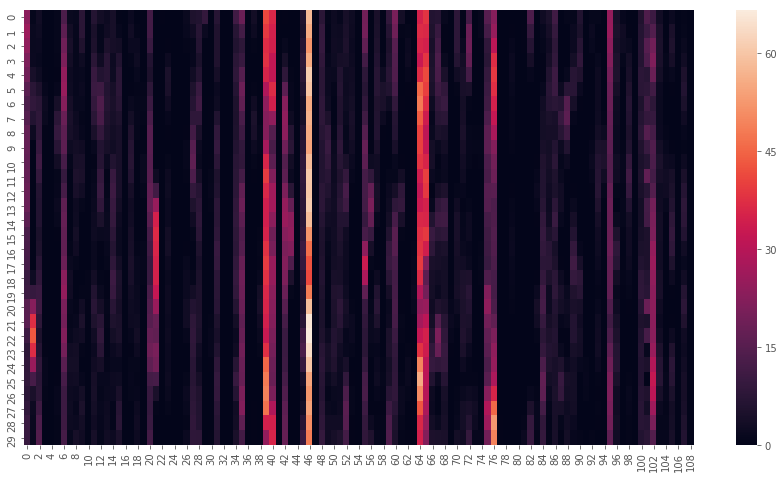

In [85]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(temp.T)
plt.show()

## Individual Trial: Post-Ketamine

In [86]:
temp = df
temp = temp[temp['trialNum']==125]
temp = temp.iloc[0:109]
temp = temp[BinDataKeys]
temp = temp.reset_index().drop('index',axis=1)
temp = np.array(temp)
row_sum = temp.sum(axis=1)
row_sum[row_sum==0.0]=1.0
new_temp = temp/row_sum[:,np.newaxis]

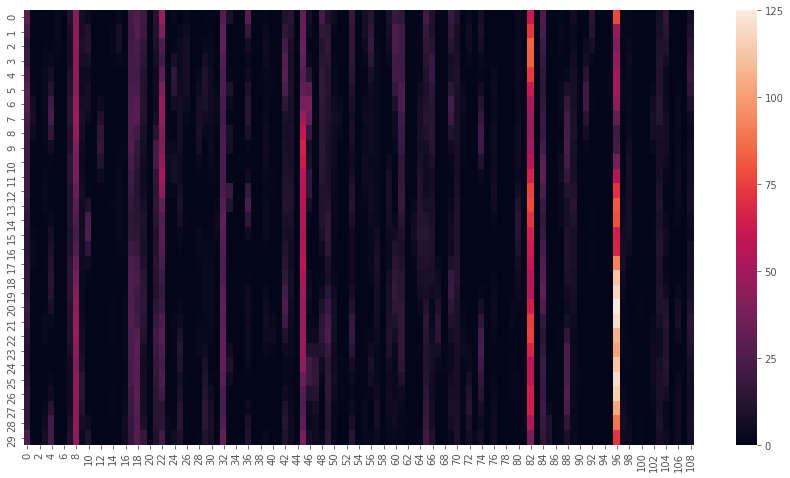

In [87]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(temp.T)
plt.show()

## Individual Cell

In [88]:
temp = df
temp = temp[temp['cellNum']==42]
#temp = temp.iloc[0:109]
temp = temp[BinDataKeys]
temp = temp.reset_index().drop('index',axis=1)
temp = np.array(temp)
row_sum = temp.sum(axis=1)
row_sum[row_sum==0.0]=1.0
new_temp = temp/row_sum[:,np.newaxis]

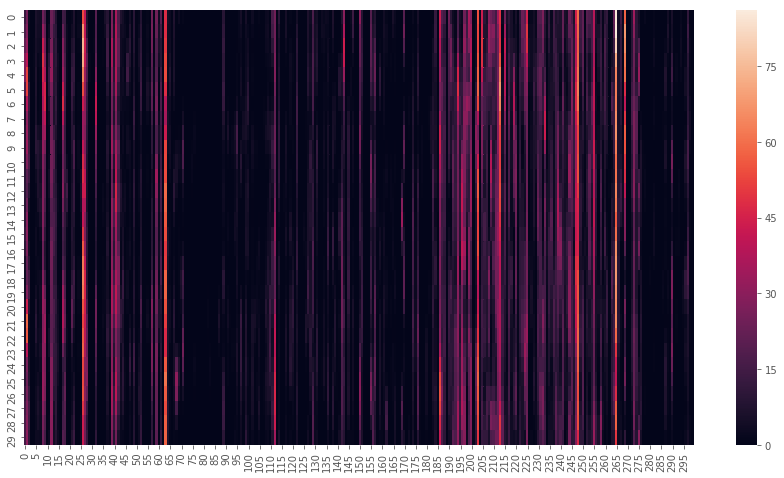

In [89]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(temp.T)
plt.show()

In [70]:
temp.shape

(109, 30)

In [72]:
pd.DataFrame(temp)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.029294,0.000000,0.686461,2.971239,5.084996,3.543898,1.066269,1.018992,3.766184,6.343442,...,0.028313,0.196349,0.450826,0.846075,1.991314,3.298760,3.005561,2.311250,1.695883,1.629102
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.226500,1.629378,4.411530,6.217920,5.942907,4.619075,5.041232,...,2.183434,1.223821,0.305480,0.088819,1.174274,3.571156,4.344525,2.117069,0.408575,0.387683
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.028295,3.163952,5.510967,7.559333,7.269698,5.132161,2.824010,1.787941,3.359948,6.074616,...,2.271705,2.724719,4.111111,5.881962,7.073269,8.576230,9.995577,8.650487,6.719352,5.931610
5,4.139781,5.255547,4.988204,4.198193,2.229328,1.584869,2.287098,1.734096,0.521275,0.123798,...,3.800815,1.429333,1.444924,2.541220,1.926773,0.637783,0.741219,2.243636,2.946854,1.803443
6,14.313202,9.039439,3.284785,0.566240,0.034772,0.371743,1.800169,4.191998,5.625110,4.630676,...,2.800515,1.119008,1.546339,3.652771,4.328154,3.426824,2.934382,2.449121,3.267942,7.026943
7,1.069984,0.718311,0.283048,0.062057,0.003239,0.000000,0.000000,0.000000,0.096591,0.499378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.901652,0.392698,0.056625,0.000000,0.000000,0.000000,0.005326,0.054098,0.149489,0.163937,...,4.596689,3.990776,3.026273,2.414236,2.074946,1.244919,0.420524,0.460858,1.270667,1.935040
9,1.190159,0.230427,1.454944,4.846027,7.171558,4.885086,1.851664,1.209505,1.202203,0.523597,...,2.408466,2.308763,1.799265,2.026716,2.223577,2.521852,2.638867,1.824984,1.862277,2.533207


,spatialBin10cm11,spatialBin10cm12,spatialBin10cm13,spatialBin10cm14,spatialBin10cm15,spatialBin10cm16,spatialBin10cm17,spatialBin10cm18,spatialBin10cm19,spatialBin10cm20,...,spatialBin10cm31,spatialBin10cm32,spatialBin10cm33,spatialBin10cm34,spatialBin10cm35,spatialBin10cm36,spatialBin10cm37,spatialBin10cm38,spatialBin10cm39,spatialBin10cm40
0,0.029294,0.000000,0.686461,2.971239,5.084996,3.543898,1.066269,1.018992,3.766184,6.343442,...,0.028313,0.196349,0.450826,0.846075,1.991314,3.298760,3.005561,2.311250,1.695883,1.629102
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.226500,1.629378,4.411530,6.217920,5.942907,4.619075,5.041232,...,2.183434,1.223821,0.305480,0.088819,1.174274,3.571156,4.344525,2.117069,0.408575,0.387683
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.028295,3.163952,5.510967,7.559333,7.269698,5.132161,2.824010,1.787941,3.359948,6.074616,...,2.271705,2.724719,4.111111,5.881962,7.073269,8.576230,9.995577,8.650487,6.719352,5.931610
5,4.139781,5.255547,4.988204,4.198193,2.229328,1.584869,2.287098,1.734096,0.521275,0.123798,...,3.800815,1.429333,1.444924,2.541220,1.926773,0.637783,0.741219,2.243636,2.946854,1.803443
6,14.313202,9.039439,3.284785,0.566240,0.034772,0.371743,1.800169,4.191998,5.625110,4.630676,...,2.800515,1.119008,1.546339,3.652771,4.328154,3.426824,2.934382,2.449121,3.267942,7.026943
7,1.069984,0.718311,0.283048,0.062057,0.003239,0.000000,0.000000,0.000000,0.096591,0.499378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.901652,0.392698,0.056625,0.000000,0.000000,0.000000,0.005326,0.054098,0.149489,0.163937,...,4.596689,3.990776,3.026273,2.414236,2.074946,1.244919,0.420524,0.460858,1.270667,1.935040
9,1.190159,0.230427,1.454944,4.846027,7.171558,4.885086,1.851664,1.209505,1.202203,0.523597,...,2.408466,2.308763,1.799265,2.026716,2.223577,2.521852,2.638867,1.824984,1.862277,2.533207


In [55]:
temp_t25_bin.drop('level_0',axis=1,inplace=True)

In [56]:
temp_t25_bin

,spatialBin10cm11,spatialBin10cm12,spatialBin10cm13,spatialBin10cm14,spatialBin10cm15,spatialBin10cm16,spatialBin10cm17,spatialBin10cm18,spatialBin10cm19,spatialBin10cm20,...,spatialBin10cm31,spatialBin10cm32,spatialBin10cm33,spatialBin10cm34,spatialBin10cm35,spatialBin10cm36,spatialBin10cm37,spatialBin10cm38,spatialBin10cm39,spatialBin10cm40
0,0.029294,0.000000,0.686461,2.971239,5.084996,3.543898,1.066269,1.018992,3.766184,6.343442,...,0.028313,0.196349,0.450826,0.846075,1.991314,3.298760,3.005561,2.311250,1.695883,1.629102
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.226500,1.629378,4.411530,6.217920,5.942907,4.619075,5.041232,...,2.183434,1.223821,0.305480,0.088819,1.174274,3.571156,4.344525,2.117069,0.408575,0.387683
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.028295,3.163952,5.510967,7.559333,7.269698,5.132161,2.824010,1.787941,3.359948,6.074616,...,2.271705,2.724719,4.111111,5.881962,7.073269,8.576230,9.995577,8.650487,6.719352,5.931610
5,4.139781,5.255547,4.988204,4.198193,2.229328,1.584869,2.287098,1.734096,0.521275,0.123798,...,3.800815,1.429333,1.444924,2.541220,1.926773,0.637783,0.741219,2.243636,2.946854,1.803443
6,14.313202,9.039439,3.284785,0.566240,0.034772,0.371743,1.800169,4.191998,5.625110,4.630676,...,2.800515,1.119008,1.546339,3.652771,4.328154,3.426824,2.934382,2.449121,3.267942,7.026943
7,1.069984,0.718311,0.283048,0.062057,0.003239,0.000000,0.000000,0.000000,0.096591,0.499378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.901652,0.392698,0.056625,0.000000,0.000000,0.000000,0.005326,0.054098,0.149489,0.163937,...,4.596689,3.990776,3.026273,2.414236,2.074946,1.244919,0.420524,0.460858,1.270667,1.935040
9,1.190159,0.230427,1.454944,4.846027,7.171558,4.885086,1.851664,1.209505,1.202203,0.523597,...,2.408466,2.308763,1.799265,2.026716,2.223577,2.521852,2.638867,1.824984,1.862277,2.533207


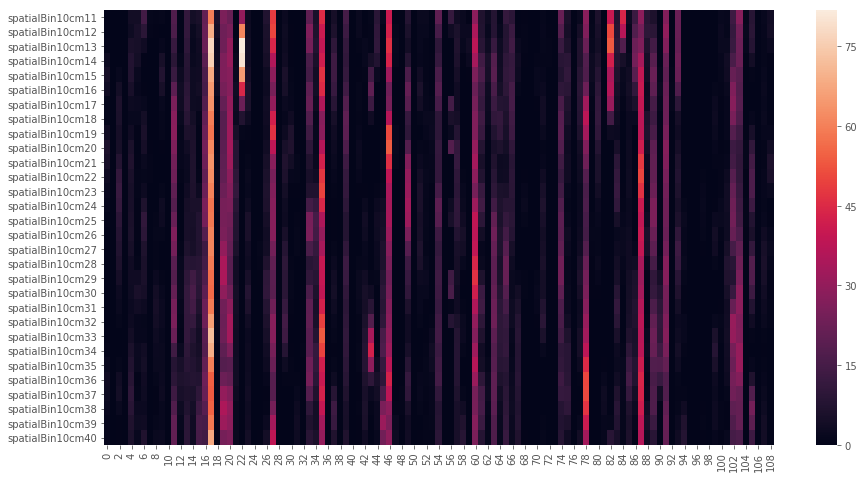

# Post-Ketamine Behavioral and Metadata

In [90]:
allData = pd.read_csv('postKetamineTable.csv')

In [91]:
# Remove any rows with nans
allDataNN = pd.DataFrame.dropna(allData,'index')
print("After Drop NaN")
print("num_rows =",len(allDataNN))

After Drop NaN
num_rows = 4995


In [92]:
ketBool = allDataNN['ketamineAdministered']
timeSinceKetamine = allDataNN['timeSinceKetamine']
sessionDate = allDataNN['sessionDate']
trialNum = allDataNN['trialNum']
VizData = allDataNN[['correlationScore', 'lickAccuracy',
       'lickNumber', 'avgFR', 'avgSingleCellVariance',
       'varianceFR', 'avgTrialSpeed', 'varianceSpeed']]

In [93]:
X, X_test, y, y_test = train_test_split(VizData,timeSinceKetamine.values.ravel(), test_size=0.2)

In [94]:
df_train = pd.DataFrame(X)
df_train['timeSinceKetamine'] = y
df_vis = df_train.copy()

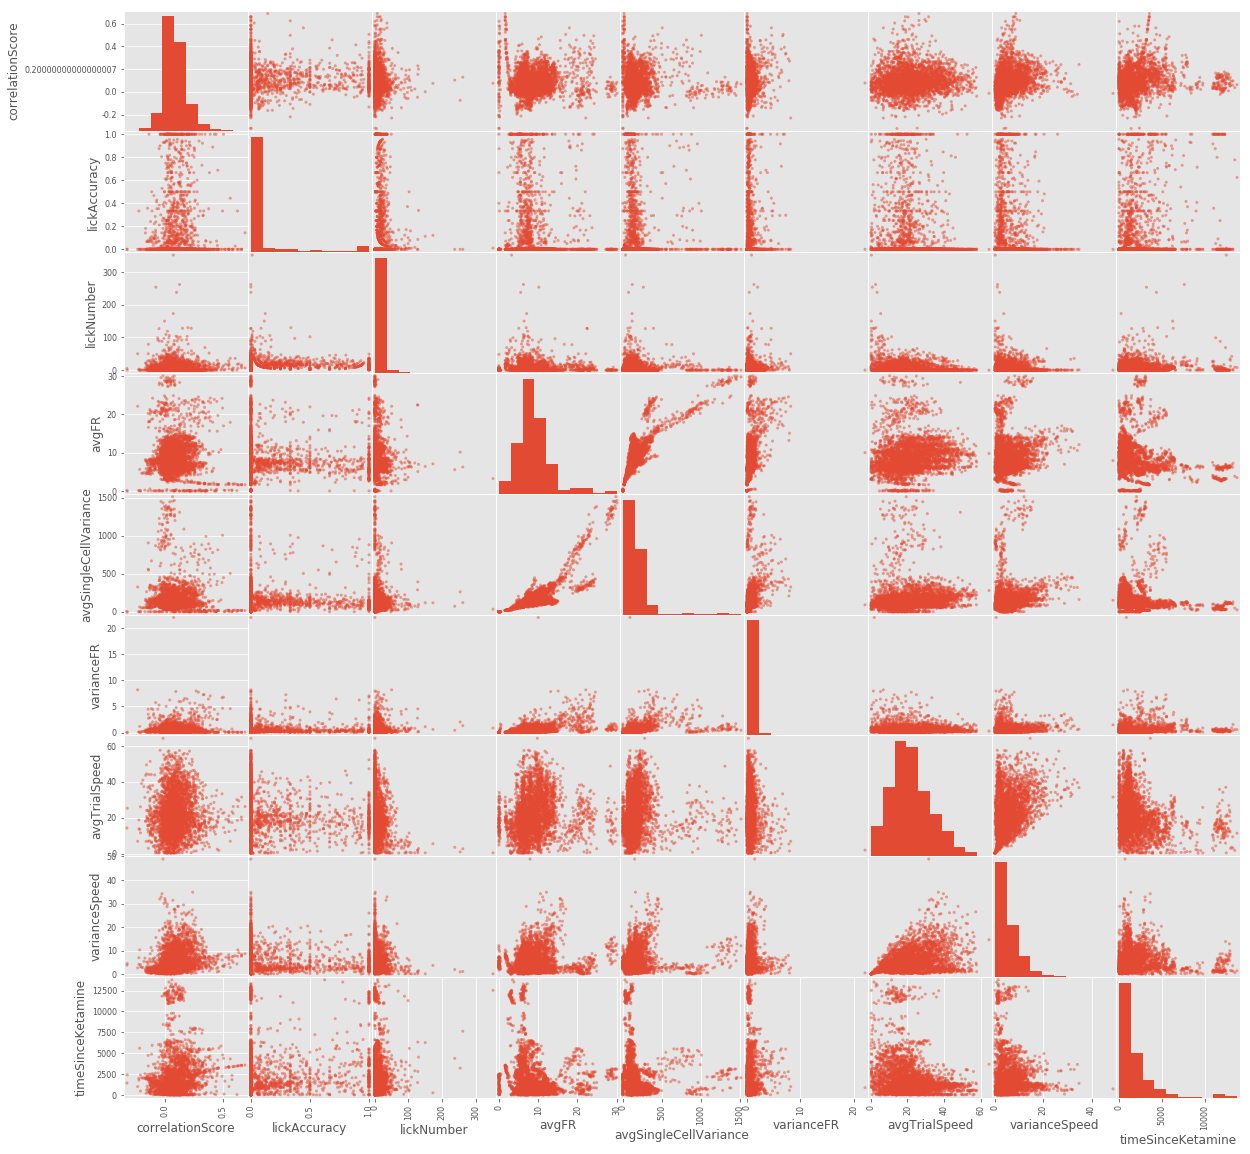

In [95]:
axes = pd.plotting.scatter_matrix(df_vis, figsize=(20,20))
plt.savefig('scatter_matrix.png')

In [96]:
max(y)

13781.8

In [97]:
min(y)

9.560000000000171

In [98]:
mean_y = np.mean(y)

In [99]:
y_pred = mean_y*np.ones(np.shape(y))

In [100]:
rmse = np.sqrt(mean_squared_error(y_pred,y))

In [101]:
rmse

2265.6229838731456